# Spam message classification 
  Random forest and support vector classifier are built to classify mail as ham or spam.

In [49]:
# import basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [50]:
# read the file
data=pd.read_csv('spam_data.tsv',sep='\t')

In [51]:
data.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
 2   length   5572 non-null   int64 
 3   punct    5572 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 174.2+ KB


In [53]:
# check for missing values
data.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [54]:
data.shape

(5572, 4)

In [55]:
# count of labels
data['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [56]:
data['label'].value_counts()/len((data))

ham     0.865937
spam    0.134063
Name: label, dtype: float64

Dataset is imbalanced

In [57]:
# lets make data balanced
ham=data[data['label']=='ham']
spam=data[data['label']=='spam']

In [58]:
ham.shape,spam.shape

((4825, 4), (747, 4))

In [59]:
ham=ham.sample(spam.shape[0])

In [60]:
#now data is balanced
ham.shape,spam.shape

((747, 4), (747, 4))

In [61]:
# lets append ham and spam
data=ham.append(spam,ignore_index=True)

In [62]:
data.shape

(1494, 4)

In [63]:
# data labels are balanced
data['label'].value_counts()

spam    747
ham     747
Name: label, dtype: int64

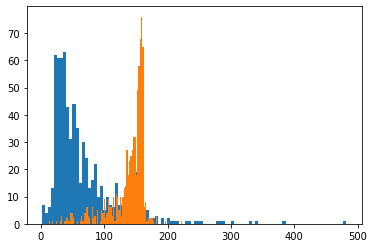

In [64]:
plt.hist(data[data['label']=='ham']['length'],bins=100)
plt.hist(data[data['label']=='spam']['length'],bins=100)
plt.show()

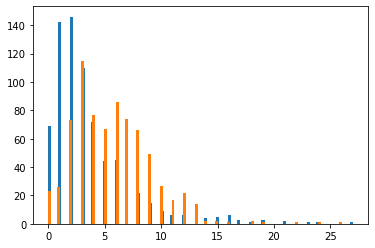

In [65]:
plt.hist(data[data['label']=='ham']['punct'],bins=100)
plt.hist(data[data['label']=='spam']['punct'],bins=100)
plt.show()

Split data into x and y

In [82]:
x=data['message']
y=data['label']

In [83]:
#split data for train and test
from sklearn.model_selection import train_test_split

In [84]:
X_train, X_test, y_train, y_test =  train_test_split(x, y, test_size = 0.3, random_state =0, shuffle = True)

# Random forest

In [92]:
# import Tfidfvectorizer and random forest model
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [101]:
model=Pipeline([('tfidf',TfidfVectorizer()),('model',RandomForestClassifier(n_estimators=20))])

In [102]:
model.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('model', RandomForestClassifier(n_estimators=20))])

In [103]:
y_pred=model.predict(X_test)

In [104]:
# evaluate the model using classification_report,confusion_matrix and accuracy_score
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
accuracy_score(y_test,y_pred)

0.9465478841870824

In [105]:
confusion_matrix(y_test,y_pred)

array([[225,   2],
       [ 22, 200]])

In [106]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.91      0.99      0.95       227
        spam       0.99      0.90      0.94       222

    accuracy                           0.95       449
   macro avg       0.95      0.95      0.95       449
weighted avg       0.95      0.95      0.95       449



# Support vector machine

In [113]:
from sklearn.svm import SVC

In [114]:
model=Pipeline([('tfidf',TfidfVectorizer()),('model',SVC())])

In [115]:
model.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('model', SVC())])

In [116]:
y_pred=model.predict(X_test)

In [117]:
accuracy_score(y_test,y_pred)

0.9710467706013363

In [118]:
confusion_matrix(y_test,y_pred)

array([[225,   2],
       [ 11, 211]])

In [119]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.95      0.99      0.97       227
        spam       0.99      0.95      0.97       222

    accuracy                           0.97       449
   macro avg       0.97      0.97      0.97       449
weighted avg       0.97      0.97      0.97       449



In [123]:
# lets check for our own data
A = ['Hello, welcome to  natural Language Processing tutorial']
B = ['hey! hope you are doing great ,how is your preparation?']
C = ['Congratulations, You won a lottery ticket worth $100 Million ! To claim call on 589557']

In [126]:
list=[A,B,C]
for x in list:
  print(model.predict(x))

['ham']
['ham']
['spam']
